array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f7c65d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122ec04d0>]], dtype=object)

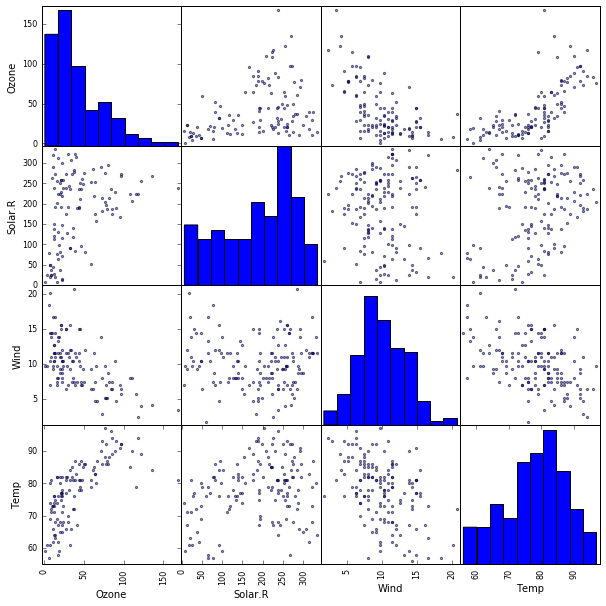

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from pandas.tools.plotting import scatter_matrix

datum = pd.read_csv("airquality.tsv", sep="\t", index_col=0, usecols=[0, 1, 2, 3, 4])

scatter_matrix(datum, figsize=(10, 10))

In [3]:
model = """
data {
  int<lower=0> N;
  vector[N] temp;
  vector[N] wind;
  vector[N] ozone;
}
parameters { 
  real beta_0;
  real beta_wind;
  real beta_temp;
  real<lower=0> sigma;
}
model { 
  ozone ~ normal(beta_0 + beta_wind * wind + beta_temp * temp, sigma);
}
"""

In [4]:
filtered_datum = datum.dropna()
datum_array = np.transpose(filtered_datum.reset_index().values)
ozones = datum_array[1]
winds = datum_array[3]
temps = datum_array[4]

In [5]:
fit = pystan.stan(model_code=model, data=dict(temp=temps, wind=winds, ozone=ozones, N=len(temps)))

In [5]:
fit

Inference for Stan model: anon_model_9046ea6597d9f0d22691262a7389930b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta_0    -67.24    0.93  23.19 -111.7 -82.74 -67.35 -51.77 -21.25  618.0    1.0
beta_wind  -3.29    0.02   0.66  -4.59  -3.74   -3.3  -2.86  -1.96  768.0    1.0
beta_temp   1.83  9.9e-3   0.25   1.32   1.66   1.83    2.0   2.31  634.0   1.01
sigma      22.02    0.05   1.55  19.28  20.93  21.94  22.98  25.32  840.0    1.0
lp__      -394.6    0.05   1.44 -398.4 -395.3 -394.3 -393.6 -392.9  750.0    1.0

Samples were drawn using NUTS(diag_e) at Tue Jul  5 12:53:11 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

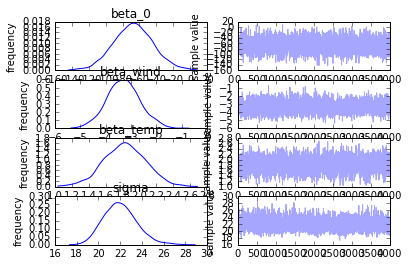

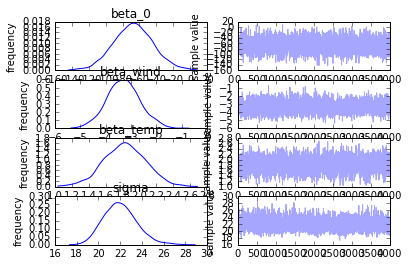

In [6]:
fit.plot()

In [1]:
samples = fit.extract(permuted=True)
beta_0 = np.mean(samples["beta_0"])
beta_0
beta_wind = np.mean(samples["beta_wind"])
beta_wind
beta_temp = np.mean(samples["beta_temp"])
beta_temp

NameError: name 'fit' is not defined

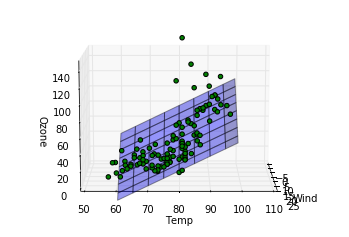

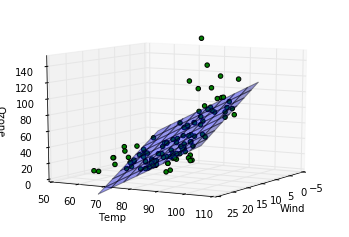

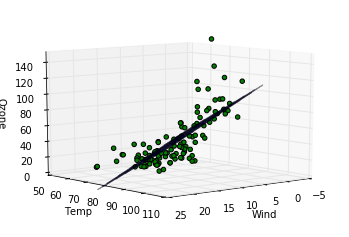

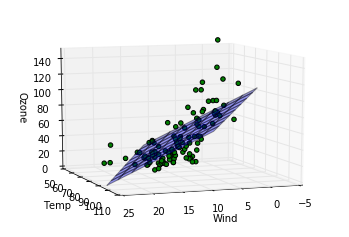

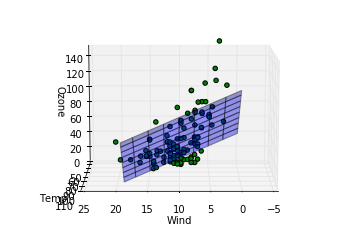

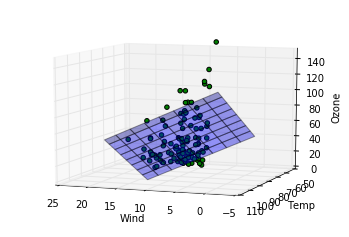

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def show_with_angle(angle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev = 10., azim = angle)
    x = np.arange(0, 20, 0.5)
    y = np.arange(60, 100, 1.0)
    X, Y = np.meshgrid(x, y)
    Z = beta_0 + beta_wind * X + beta_temp * Y
    surf = ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, alpha = 0.4)
    ax.set_zlim(0, 150)
    ax.scatter(winds, temps, ozones, c='green', marker='o', alpha=1)
    ax.set_xlabel('Wind')
    ax.set_ylabel('Temp')
    ax.set_zlabel('Ozone')
    plt.show()
    
show_with_angle(0)
show_with_angle(30)
show_with_angle(50)
show_with_angle(70)
show_with_angle(90)
show_with_angle(110)